# Build Dataset

In [1]:
# Import Libraries 

import pandas as pd
import random

In [2]:
# Load the dataset file path

Train_Dataset_Path = 'Train_StudentPerformance.xlsx'
course_id = "19CSE301"

In [3]:
# Generate synthetic data for a specified number of rows

df_courses = pd.read_excel('Courses.xlsx',sheet_name=course_id)
Assessments = list(df_courses['Assessments'])
Converted_Marks = list(df_courses['Converted Marks'].values)
        
max_scores = dict(zip(Assessments, Converted_Marks))
total_max_score = sum(max_scores.values())
threshold_score = 0.75 * total_max_score

Strategies = list(df_courses['Strategies'])
Assessments_strategy = dict(zip(Assessments, Strategies))

df_courses = pd.read_excel('Courses.xlsx',sheet_name=course_id)        
Assessments = list(df_courses['Assessments'])
Converted_Marks = list(df_courses['Converted Marks'].values)
max_scores = dict(zip(Assessments, Converted_Marks))
total_max_score = sum(max_scores.values())
threshold_score = 0.75 * total_max_score
        
def generate_synthetic_data(row_count):
            data = []
            for i in range(row_count):
                row = {
                    'Student Id': 22000 + i,  # Generate student IDs incrementally
                    'Class': 'CSE A',  # Assuming class is the same for all
                }
                for assessment in max_scores.keys():
                    row[assessment] = random.randint(0, max_scores[assessment])
                data.append(row)
            return pd.DataFrame(data)

row_count = 100000
df = generate_synthetic_data(row_count)
df.to_excel(Train_Dataset_Path, index=False)

In [4]:
# Generate the recommendations

def generate_recommendations_based_on_total(row):

    total_score = 0
    for _ , mark in row.items():
        if _ not in ['Student Id', 'Class']:
            total_score += mark

    if total_score < threshold_score:
        recommendations = []
        for assessment, con_marks in max_scores.items():
            if row[assessment] < 0.75 * con_marks:
                recommendations.append(Assessments_strategy[assessment])
        
        return "; ".join(recommendations) if recommendations else "Improve performance"
    
    elif (total_score >= threshold_score) and (total_score < 0.85 * total_max_score):
        recommendations = ["Good performance overall"]
        for assessment, con_marks in max_scores.items():
            if row[assessment] < 0.75 * con_marks:
                recommendations.append(Assessments_strategy[assessment])
        
        return "; ".join(recommendations) if recommendations else "Improve performance"
    
    elif (total_score >= 0.85 * total_max_score) and (total_score < 0.9 * total_max_score):
        recommendations = ["Excelent performance overall"]
        for assessment, con_marks in max_scores.items():
            if row[assessment] < 0.75 * con_marks:
                recommendations.append(Assessments_strategy[assessment])
        
        return "; ".join(recommendations) if recommendations else "Improve performance"
    
    elif (total_score >= 0.9 * total_max_score):
        return "Outstanding performance overall"

df['Recommendation'] = df.apply(generate_recommendations_based_on_total, axis=1)
df.to_excel(Train_Dataset_Path, index=False)
print(f"Dataset created successfully.")


Dataset created successfully.


# Train

#### Enable Multi Label to pass as a single parameter

In [5]:
import skmultilearn
file = skmultilearn.__file__
file_path = file[:-11] + "adapt\\mlknn.py"

with open(file_path, 'r') as file:
    file_contents = file.read()

modified_contents = file_contents.replace('NearestNeighbors(self.k)', 'NearestNeighbors(n_neighbors=self.k)')

with open(file_path, 'w') as file:
    file.write(modified_contents)

print("File modified and saved successfully.")

File modified and saved successfully.


#### Model Training Phase

In [6]:
import pandas as pd
import numpy as np
from skmultilearn.adapt import MLkNN
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_excel(Train_Dataset_Path)

# Define features and labels
X = df[Assessments]

# Preprocess the recommendations to convert them into multiple binary labels
# Here we assume that each recommendation has a unique string and split them
df['Recommendation'] = df['Recommendation'].fillna("")
df['Recommendation'] = df['Recommendation'].apply(lambda x: x.split("; ") if x else [])

# MultiLabelBinarizer to convert string labels into binary form
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['Recommendation'])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

best_k = None
best_accuracy = 0.0

# Loop through a range of k values to find the optimal one
for k in range(22, 26):  # Testing k from 22 to 25
    mlknn = MLkNN(k=k)
    mlknn.fit(X_train, Y_train)
    
    # Predict on the test data
    Y_pred = mlknn.predict(X_test)
    
    # Evaluate the model's accuracy
    accuracy = accuracy_score(Y_test, Y_pred.toarray())
    print(f"k={k}, Accuracy: {accuracy * 100:.2f}%")
    
    # Update the best k and accuracy if this one is better
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Print the final result
print(f"\nBest k value: {best_k} with Accuracy: {best_accuracy * 100:.2f}%")

k=22, Accuracy: 87.62%
k=23, Accuracy: 87.90%
k=24, Accuracy: 88.24%
k=25, Accuracy: 88.83%

Best k value: 25 with Accuracy: 88.83%


#### Download the Trained model

In [7]:
import joblib

model_file_path = 'train_model.joblib'
joblib.dump(mlknn, model_file_path)
mlb_file_path = 'train_mlb.joblib'
joblib.dump(mlb, mlb_file_path)  # Save the MultiLabelBinarizer

print(f"Model saved as {model_file_path}")
print(f"MLB saved as {mlb_file_path}")



Model saved as train_model.joblib
MLB saved as train_mlb.joblib


# Code Initialising

In [8]:
# Libraries

import numpy as np
import pandas as pd

In [9]:
# Course Code Entry

#course_id = input("Enter Course ID: ")
course_id = "19CSE301"

In [10]:
# Load the Student Dataset

df_test = pd.read_excel('Students.xlsx',sheet_name=course_id)

# Load the Course Dataset

df_courses = pd.read_excel('Courses.xlsx',sheet_name=course_id)

In [11]:
# View Head of Student dataset 

df_test.head()

,Student Id,Class,Assignment 1,Assignment 2,Quiz 1,Quiz 2,Mid Lab Exam,Mid Exam,Final Exam
0,22001,CSE A,8,7,7,6,22,38,88
1,22002,CSE A,6,6,8,5,20,43,84
2,22003,CSE A,7,3,8,5,23,46,92
3,22004,CSE B,5,10,9,4,15,39,84
4,22005,CSE A,6,8,7,5,16,39,85


In [12]:
# View Course dataset 

df_courses

,Assessments,Total Marks,Converted Marks,Curriculum,Strategies
0,Assignment 1,10,10,"Introduction to the Network, The Internet, The...",Watch introductory videos and use network simu...
1,Assignment 2,10,10,"The Network Core, Circuit switching and packet...",Perform packet-switched network exercises with...
2,Quiz 1,10,5,"Protocol Layers and their Service Models, IP s...",Study OSI and TCP/IP models using mind maps an...
3,Quiz 2,10,5,Introduction to principles of Network Applicat...,Analyze HTTP requests with Chrome DevTools and...
4,Mid Lab Exam,30,15,"Basic Networking Commands, Socket programming ...",Practice networking commands and write socket ...
5,Mid Exam,50,20,"Introduction to the Network, The Internet, The...",Take mock exams and create comprehensive revis...
6,Final Exam,100,35,"Introduction to the Network, The Internet, The...",Attempt full practice tests and participate in...


# Data Preprocessing

In [13]:
df_test.isnull().sum()

Student Id      0
Class           0
Assignment 1    0
Assignment 2    0
Quiz 1          0
Quiz 2          0
Mid Lab Exam    0
Mid Exam        0
Final Exam      0
dtype: int64

In [14]:
Assessments = df_courses['Assessments']
print(Assessments)

0    Assignment 1
1    Assignment 2
2          Quiz 1
3          Quiz 2
4    Mid Lab Exam
5        Mid Exam
6      Final Exam
Name: Assessments, dtype: object


In [15]:
for i in Assessments:
        df_test[i].fillna(0, inplace=True)
        df_test[i] = df_test[i].astype(int)
df_test

,Student Id,Class,Assignment 1,Assignment 2,Quiz 1,Quiz 2,Mid Lab Exam,Mid Exam,Final Exam
0,22001,CSE A,8,7,7,6,22,38,88
1,22002,CSE A,6,6,8,5,20,43,84
2,22003,CSE A,7,3,8,5,23,46,92
3,22004,CSE B,5,10,9,4,15,39,84
4,22005,CSE A,6,8,7,5,16,39,85
...,...,...,...,...,...,...,...,...,...
65,22066,CSE A,10,6,8,5,28,48,98
66,22067,CSE A,10,7,9,4,29,50,97
67,22068,CSE B,5,5,7,5,20,41,89
68,22069,CSE A,6,6,6,5,29,50,97


In [16]:
df_test.to_excel('Students.xlsx', sheet_name=course_id, index=False)

#### Convert Marks

In [17]:
Total_Marks = list(df_courses['Total Marks'].values)
Converted_Marks = list(df_courses['Converted Marks'].values)
print(Total_Marks)
print(Converted_Marks)

[10, 10, 10, 10, 30, 50, 100]
[10, 10, 5, 5, 15, 20, 35]


In [18]:
Converted_Assessments_name = []

for i,j in enumerate(Assessments):
    converted_column_name = j + ' Converted'
    Converted_Assessments_name.append(converted_column_name)
    df_test[converted_column_name] = round((df_test[j] * Converted_Marks[i])/ Total_Marks[i])
    df_test[converted_column_name] = df_test[converted_column_name].astype(int)
    
df_test.to_excel('Students.xlsx', sheet_name=course_id, index=False)
df_test

,Student Id,Class,Assignment 1,Assignment 2,Quiz 1,Quiz 2,Mid Lab Exam,Mid Exam,Final Exam,Assignment 1 Converted,Assignment 2 Converted,Quiz 1 Converted,Quiz 2 Converted,Mid Lab Exam Converted,Mid Exam Converted,Final Exam Converted
0,22001,CSE A,8,7,7,6,22,38,88,8,7,4,3,11,15,31
1,22002,CSE A,6,6,8,5,20,43,84,6,6,4,2,10,17,29
2,22003,CSE A,7,3,8,5,23,46,92,7,3,4,2,12,18,32
3,22004,CSE B,5,10,9,4,15,39,84,5,10,4,2,8,16,29
4,22005,CSE A,6,8,7,5,16,39,85,6,8,4,2,8,16,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,22066,CSE A,10,6,8,5,28,48,98,10,6,4,2,14,19,34
66,22067,CSE A,10,7,9,4,29,50,97,10,7,4,2,14,20,34
67,22068,CSE B,5,5,7,5,20,41,89,5,5,4,2,10,16,31
68,22069,CSE A,6,6,6,5,29,50,97,6,6,3,2,14,20,34


In [19]:
for i,j in enumerate(Assessments):
    df_test['Total'] = df_test[Converted_Assessments_name].sum(axis=1)
    
df_test.to_excel('Students.xlsx', sheet_name=course_id, index=False)
df_test

,Student Id,Class,Assignment 1,Assignment 2,Quiz 1,Quiz 2,Mid Lab Exam,Mid Exam,Final Exam,Assignment 1 Converted,Assignment 2 Converted,Quiz 1 Converted,Quiz 2 Converted,Mid Lab Exam Converted,Mid Exam Converted,Final Exam Converted,Total
0,22001,CSE A,8,7,7,6,22,38,88,8,7,4,3,11,15,31,79
1,22002,CSE A,6,6,8,5,20,43,84,6,6,4,2,10,17,29,74
2,22003,CSE A,7,3,8,5,23,46,92,7,3,4,2,12,18,32,78
3,22004,CSE B,5,10,9,4,15,39,84,5,10,4,2,8,16,29,74
4,22005,CSE A,6,8,7,5,16,39,85,6,8,4,2,8,16,30,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,22066,CSE A,10,6,8,5,28,48,98,10,6,4,2,14,19,34,89
66,22067,CSE A,10,7,9,4,29,50,97,10,7,4,2,14,20,34,91
67,22068,CSE B,5,5,7,5,20,41,89,5,5,4,2,10,16,31,73
68,22069,CSE A,6,6,6,5,29,50,97,6,6,3,2,14,20,34,85


# Test

In [20]:
import pandas as pd
import joblib  # or import pickle

# Load the trained MLkNN model
model_file_path = 'train_model.joblib'  # or use 'mlknn_model.pkl' if you used pickle
loaded_model = joblib.load(model_file_path)

df_students = pd.read_excel('Students.xlsx',sheet_name=course_id)

# Prepare your test input data
# Make sure the test data is structured like the training data
recommendations_list = []

for index, row in df_students.iterrows():
    test_data = {assessment[:-10]: [f"{row[assessment]:.2f}"] for assessment in Converted_Assessments_name}
    test_df = pd.DataFrame(test_data)

    mlb = joblib.load(mlb_file_path) 
    predictions = loaded_model.predict(test_df)
    predicted_labels = mlb.inverse_transform(predictions.toarray())

    recommendation = ""
    for i, labels in enumerate(predicted_labels):
        if labels:
            recommendation += f"{', '.join(labels)}; "
        else:
            recommendation += "No Recommendations; "
    recommendations_list.append(recommendation)

df_students['Recommendations'] = recommendations_list

df_students.to_excel('Students.xlsx', sheet_name=course_id, index=False)

print("Recommendations done")

Recommendations done


In [21]:
df_test = pd.read_excel('Students.xlsx',sheet_name=course_id)
df_test

,Student Id,Class,Assignment 1,Assignment 2,Quiz 1,Quiz 2,Mid Lab Exam,Mid Exam,Final Exam,Assignment 1 Converted,Assignment 2 Converted,Quiz 1 Converted,Quiz 2 Converted,Mid Lab Exam Converted,Mid Exam Converted,Final Exam Converted,Total,Recommendations
0,22001,CSE A,8,7,7,6,22,38,88,8,7,4,3,11,15,31,79,Analyze HTTP requests with Chrome DevTools and...
1,22002,CSE A,6,6,8,5,20,43,84,6,6,4,2,10,17,29,74,Analyze HTTP requests with Chrome DevTools and...
2,22003,CSE A,7,3,8,5,23,46,92,7,3,4,2,12,18,32,78,Analyze HTTP requests with Chrome DevTools and...
3,22004,CSE B,5,10,9,4,15,39,84,5,10,4,2,8,16,29,74,Analyze HTTP requests with Chrome DevTools and...
4,22005,CSE A,6,8,7,5,16,39,85,6,8,4,2,8,16,30,74,Analyze HTTP requests with Chrome DevTools and...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,22066,CSE A,10,6,8,5,28,48,98,10,6,4,2,14,19,34,89,Analyze HTTP requests with Chrome DevTools and...
66,22067,CSE A,10,7,9,4,29,50,97,10,7,4,2,14,20,34,91,Analyze HTTP requests with Chrome DevTools and...
67,22068,CSE B,5,5,7,5,20,41,89,5,5,4,2,10,16,31,73,Analyze HTTP requests with Chrome DevTools and...
68,22069,CSE A,6,6,6,5,29,50,97,6,6,3,2,14,20,34,85,Analyze HTTP requests with Chrome DevTools and...


# Result

Analyze HTTP requests with Chrome DevTools and build web apps.


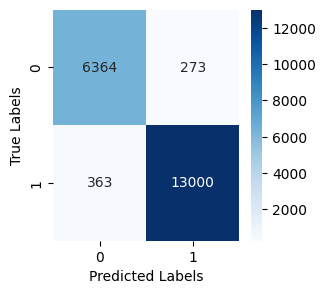

Attempt full practice tests and participate in group study sessions.


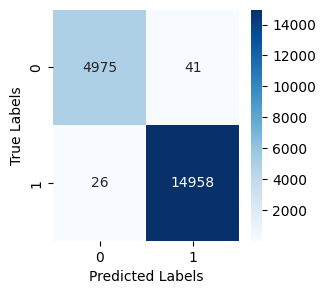

Excelent performance overall


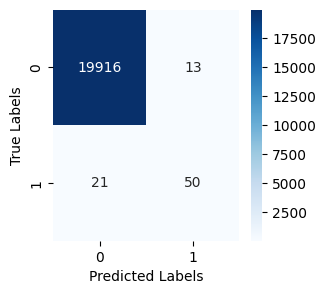

Good performance overall


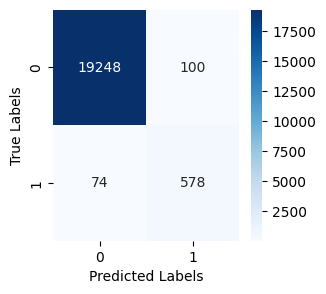

Outstanding performance overall


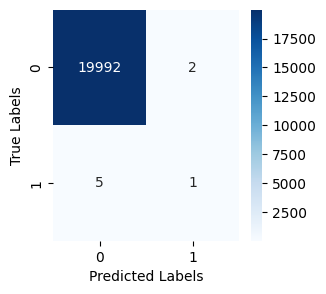

Perform packet-switched network exercises with tools like Wireshark.


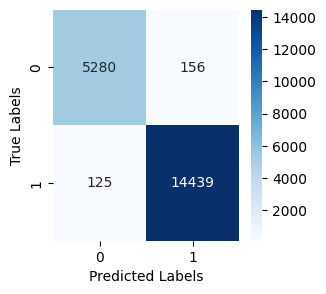

Practice networking commands and write socket programs in Java.


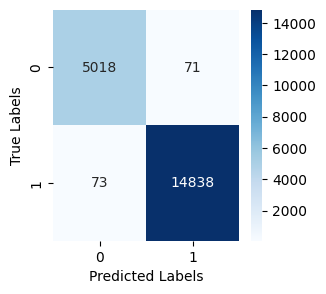

Study OSI and TCP/IP models using mind maps and packet tracing.


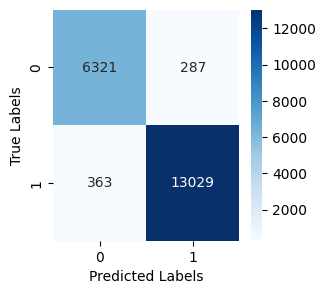

Take mock exams and create comprehensive revision notes.


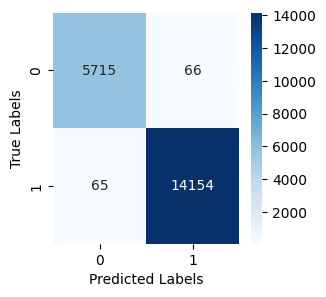

Watch introductory videos and use network simulation tools like Packet Tracer.


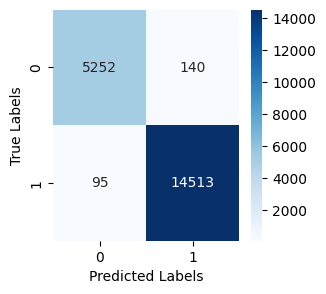

In [25]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate multi-label confusion matrices
ml_confusion_matrices = multilabel_confusion_matrix(Y_test, Y_pred)

# Iterate through each label (course strategy) and plot the confusion matrix
for idx, cm in enumerate(ml_confusion_matrices):
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    print(mlb.classes_[idx])
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Print metrics for your result section
print(f"Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Model Evaluation Metrics:
Accuracy: 0.89
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
